# Computer Assignment (CA) No. 11: Autocorrelation And Power Spectral Density

## Problem Statement

Recall the autocorrelation function is defined as:
\begin{equation} 
R(\tau) = \sum_{n=0}^{N-1}x[n]x[n-\tau], \tau= 0, 1, 2, ...,M
\end{equation} 

Compute and plot the autocorrelation function for the following signals, and then plot the power spectral density by computing the Fourier transform of the autocorrelation function.
1. Gaussian white noise: N=100, M=20.
2. An impulse function, : N = 100, M=20.
3. A periodic impulse train with a period of 20 samples: N = 200, M = 60.
4. A sinewave with a period of 20 samples: N = 200, M = 60.
5. Repeat no. 4 for N = 14, 17, 20, 23, 26. Analyze the behavior that you observe and relate it to the period of the signal.
6. The sum of (1) and (4) at an SNR of 10 dB (assume the sinewave is the signal and the Gaussian white noise is the noise): N = 200, M = 60. Explain what you observe.

> Note: You still need to take the FFT of the autocorrelated signals. 

## Approach and Results
The autocorr() and generate_sine() functions were first reconstructed as can be seen below. The numby and scipy libraries were also loaded, and a plot style was applied because it looks awesome. 

In [2]:
%pylab inline 
from scipy.stats import norm
plt.style.use('bmh')

def generate_sine(freq, duration, fs, snr): 
# freq: pure signal frequancy of duration with sample rate fs 
# and signal to noise ratio snr in dB.
    samples = fs*duration  # number of samples is equal to the samples per second * the number of seconds
    t = np.linspace(0, duration, samples)  # generate time vector 
    freq_radians = (2*np.pi)*freq
    x = np.sin(freq_radians*t)  # generate signal 
    e = norm.rvs(size=samples)
    c = sqrt(np.var(x)/(np.var(e)*10**(snr/20)))
    return x + c*e

def autocorr(x, M): 
    '''
        Autocorrlates signal X with a delay of M samples.
        Returns $R_{xx}(t, t-\tau). The function autocorrlated in indexed past the lag point. 
    '''
    Ryy = zeros(M+1) 
    for tau in range(M+1): 
        #print x[M:]
        #print x[M-tau:-tau]
        Ryy[tau] = sum( x[M:]*x[M-tau:len(x)-tau] )
    return Ryy

#def fftplot(x, Fs): 
#    FFTsig = fft.rfft(Ryy, n=len(x))
#    FFTfreq = fft.rfftfreq(, d=1./Fs)
#    return fftsig, fftfreq

Populating the interactive namespace from numpy and matplotlib


### Task 1
White noise $N(t)$ is defined as a random signal which is normally distributed, contains a flat power spectral density ($S_{NN}(\omega) = c$) and an expected value of 0,  ($E[N(t)] = 0$). 
    
> A white noise vector can be generated by sampling a random variable with a normal distribion with a mean of 0... I think. I'm kinda wary on this thou. I know that the PSD is flat when the number of samples $n$ is large enough, but I HAVE NO FUCKING CLUE WHY. Secondly, what the fuck is sigma doing in this. I know sigma^2 is equal to the autocorrlation of the sinal and therefore the pwr. 

The autocorrelation of white noise can be calculated as follows, 

$$ R_{NN}(t, t -\tau) = E[N(t)N(t-\tau)], $$ 

but as every sample in white noise is random, white noise should result in an auto-correlation of zero for every value except when $\tau = 0$. Further, when $\tau = 0$ the autocorrelation of $N(t)$ becomes the $E[N(t)^2]$ and with $E[N(t)] = 0$ the autocorrelation becomes 

$$R_{NN}(\tau) = \sigma^2_N \delta(\tau)$$

Strangely, this is not what appears in the plot below. The autocorrelation does spike when $\tau = 0$, but the autocorrelation does not appear to be diminishing as the lag increases. This is likely due to the finite number of lags utilized as $M \to \infty$, $R_{NN}(0)$ appears to increase...which suggests discrete representation of these signals are wonky.

<Container object of 3 artists>

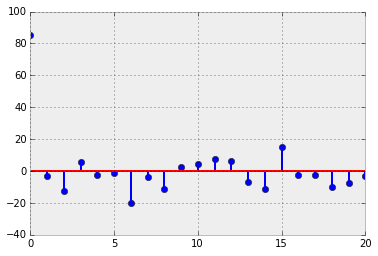

In [3]:
# 1) White Noise 
N = 100
M = 20
x = norm.rvs(size=N) 
Rxx = autocorr(x, M)
fig = figure()
ax = subplot(111)
ax.stem(range(M+1), Rxx)

### Task 2

The autocorrleation of an impulse response, $x(t) = \delta(t-10)$ is displayed below. As the plot illustrates, the autocorrleation is zero for all of $\tau$.  The calculation for the autocorrelation of $x(t)$ is as follows, 

$$ R_{xx}(t, t -\tau) = E[\delta(t-10)\delta(t-10-\tau)] $$ 

Note that when $t-10 = t-10-\tau = 0$, in other words when $\tau = 0$ their should be an impulse! 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


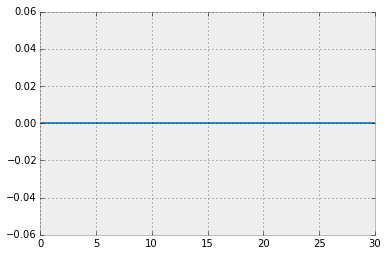

In [15]:
# 2) Impulse Response 
N = 100 
M = 30
x = 9*[0] + [1] + 80*[0]
print x
x = array(x)
Rxx = autocorr(x, M) 
print Rxx
fig = figure()
ax = subplot(111) 
ax.plot(range(M+1), Rxx) 

## Task 3
The autocorrelation of an impulse train also know as the Dirac Comb, $x(t) = \sum_{n =-\infty}^{\infty} \delta(t - nT)$ where the period $T$ in this case is 20 returns a impulse train with an identical period.  This can be seen in the plot below.

$$ R_{yy}(t, t-\tau) = E[\sum_{n =-\infty}^{\infty} \delta(t - nT)\sum_{k =-\infty}^{\infty} \delta(t - \tau - kT) ] = \sum_{n =-\infty}^{\infty} \sum_{k =-\infty}^{\infty}E[\delta(t - nT)\delta(t - \tau - kT) ]$$

This signal will deliver a value when $t-nT = t- \tau -kT = 0$ 

$$ t-nT -(t- \tau -kT) = 0 = \tau + (k - n)T = 0$$

As $k$ and $n$ are integers, $\tau$ must be equal to a multiple of the period $T$, for the expected value to have any value. This in turn would generate an impulse train with an identical period to that of $x(t)$. 

<Container object of 3 artists>

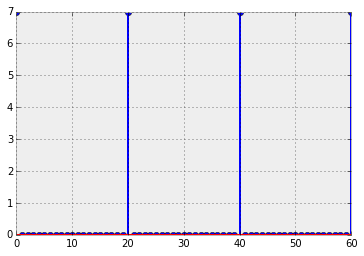

In [16]:

# 3) Impulse Train with period of 20, N = 200, M = 60
x = [1] + [0]*19
x = 10*x
x = np.array(x) 
M = 60
Rxx = autocorr(x, M) 
fig = figure()
ax = fig.add_subplot(111) 
ax.stem(range(M+1), Rxx)



### Task 4 
The autocorrelation of a sinewave, $x(t) = a\sin(wt)$  returns a sine wave as illustrated by the plot below with an identical period, and an amplitude equal to $140/2$. Explaining this value was an interesting journey. First, I examined the autocorrelation of a continous sine.

> $$ R_{xx}(t, t-\tau) = a^2E[\sin(u)\sin(u-\tau)] = 
\frac{a^2}{2}E[\cos(u-(u-\tau)) - \cos(u+u-\tau)] $$
$$ R_{xx}(t, t-\tau) = \frac{a^2}{2}E[\cos(\tau) - \cos(2u -\tau)] $$
The expected value of $\cos$ for all values of $t$ is zero leaving, 
$$ R_{xx}(t, t-\tau) = \frac{a^2}{2}\cos(\tau) $$

... but, then I cried because everything we do is digital and those our equation for autocorrelation is reaaaaallllly this. 

$$ R[n, n - \tau] = \sum_{n=0}^{N-1}x[n]x[n-\tau], \tau= 0, 1, 2, ...,M $$
thus 

$$R_{xx}[n, n- \tau] = \sum_{n=0}^{N-1}a^2\sin(\omega n)\sin(\omega(n-\tau)), \tau = 0, 1, 2, ..., M $$ 
lets assume $a^2 = 1$ for simplicity. The trigonometry still holds from the continous example. 

$$R_{xx}[n, n -\tau] = \frac{1}{2}\sum_{n=0}^{N-1}(\cos(\omega\tau) - \cos(2\omega n -\tau)), \tau = 0, 1, 2, ..., M $$ 

The summation of $\cos(2\omega n - \tau)$ will average to zero leaving 

$$R_{xx}[\tau] = \frac{1}{2}\sum_{n=0}^{N-1}(\cos(\omega\tau) = \frac{N}{2}\cos(\omega \tau).$$

Wait, a second! That still is not equal to 70. Your signal is 200 samples long! What is this 70 giberish. The signal is 200 samples in length, therefore to calculate the autocorrelation, the function starts the summations at the lag value to insure calculation will remain in bounds of the vector. Therefore, despite taking the autocorrelation of signal that is 200 samples long, the result is the autocorrelation of a signal $N-M$ samples long and an amplitude of $(N-M)/2 = 70$. 

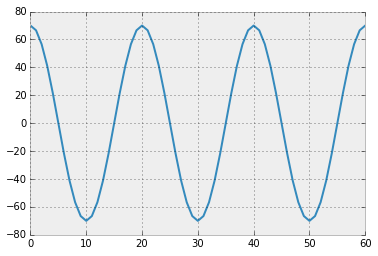

In [17]:
# 4) A sinewave with a period of 20 samples: N = 200, M = 60.
N = 200 
M = 60 
t = np.arange(200) 
y = sin(2*pi/20*t) 
Ryy = autocorr(y, M) 
fig = figure()
ax = fig.add_subplot(111) 
ax.plot(range(M+1), Ryy)

### Task 5 
Utilizing the $N$ reduction quirk of the autocorrelation function I wrote discovered struggling through task 4, $N$ was reduced for the following signals. As calculated for task 4, the amplitude of the resulting wavefrom is equal to $\frac{N}{2}$.

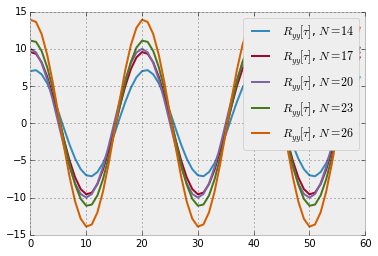

In [25]:
# 4) Repeat no. 4 for N = 14, 17, 20, 23, 26. 
#    Analyze the behavior that you observe and relate it to the period of the signal.
N = [14, 17, 20, 23, 26] 
M = 60 
t = np.arange(200) 
y = sin(2*pi/20*t) 
fig = figure()

for n in N: 
    Ryy = autocorr(y, 200 - n) 
    ax = fig.add_subplot(111) 
    ax.plot(Ryy[0:60], label=r"$R_{yy}[\tau]$, $N = %d$" %(n))
    ax.legend()

### Task 6
As displayed also in computer assignment 9, the autocorrelation of a signal containing white noise filters out portion of the noise. 
>If $x$ representes the sine wave, $a$ is a scaler, and $n$ is white noise signal, the output signal can be represented in the following form:
>
>$$ y = x + a\times n .$$ 
>The autocorrelation of the signal would be equal to 
>
>$$ R_{yy}(\tau) = R_{xx}(\tau) + aR_{xn}(\tau) + aR_{nx}(\tau) + a^2R_{nn}(\tau),$$ 
>
>but as $x(t)$ and $n(t)$ are independent their crosscorrelation ($R_{xn}$ and $R_{nx}$) is equal to a product of their means which is equal to zero reducing the autocorrelation sum to 
>
>$$ R_{yy}(\tau) = R_{xx}(\tau) + a^2R_{nn}(\tau) $$
>
>Luckily, the autocorrelation of white noise is zero except when the lag value is equal to zero, thus $R_{nn}(\tau) = R_{nn}(\tau)\delta(\tau)$ which simplies to $\sigma_n^2\delta(\tau)$ as the $E[n(t)] = 0$. This results in the final expression for the autocorrelation for output signal with a specific SNR 

>$$ R_{yy}(\tau) = R_{xx}(\tau) + a^2\sigma_N^2 \delta(\tau) $$ 

The amplitude of the waveform after the spike from the noise when $\tau$ is equal to 0 appears to be identical to that of signal in task 4 which is predicted by the equation above. The signal is still noise thou. I'm too lazy at this point to figure this out.

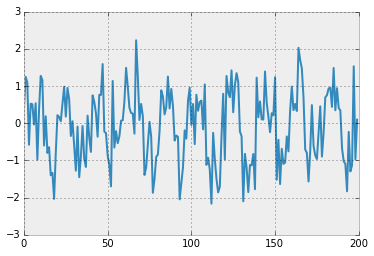

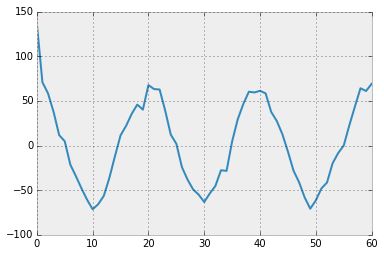

In [18]:
N = 200 
M = 60
p = 10
x = generate_sine(p, N, 1, 10) 
plot(x) 
Rxx = autocorr(x, M) 
fig = figure()
ax = fig.add_subplot(111)
ax.plot(range(M+1), Rxx)